# Car Price Prediction

- Strom Motors is an e-commerce company who act as mediators between parties interested in selling and buying pre-owned cars.

- The data about sellers and cars includes -
1. Specification details
2. Condition of car
3. Seller details
4. Registration details
5. Web advertisement details
6. Make and model information
7. Price

- They wish to develop an algorithm to predict the price of the cars based on various attributes associated with the car.

In [3]:
#Importing essential libraries
import pandas as pd #DataFrame
import numpy as np #Maths
import seaborn as sns #Visual
import matplotlib.pyplot as plt #Visual
from sklearn.model_selection import train_test_split  #Visual
from sklearn.linear_model import LinearRegression #Model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error #Error Identification

In [517]:
sns.set(rc = {'figure.figsize':(11.7,8.27)})

In [520]:
# Reading CSV file
cars_data = pd.read_csv('cars_sampled.csv')

In [521]:
#Creating a copy of dataset - It helps as a backup dataset in case of any accidental data loss.
cars = cars_data.copy(deep = True)

In [522]:
cars.head(50)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
0,30/03/2016 13:51,Zu_verkaufen,private,offer,4450,test,limousine,2003,manual,150,3er,150000,3,diesel,bmw,NaN,30/03/2016 0:00,20257,7/4/2016 4:44
1,7/3/2016 9:54,Volvo_XC90_2.4D_Summum,private,offer,13299,control,suv,2005,manual,163,xc_reihe,150000,6,diesel,volvo,no,7/3/2016 0:00,88045,26/03/2016 13:17
2,1/4/2016 0:57,Volkswagen_Touran,private,offer,3200,test,bus,2003,manual,101,touran,150000,11,diesel,volkswagen,NaN,31/03/2016 0:00,27449,1/4/2016 8:40
3,19/03/2016 17:50,Seat_Ibiza_1.4_16V_Reference,private,offer,4500,control,small car,2006,manual,86,ibiza,60000,12,petrol,seat,no,19/03/2016 0:00,34537,7/4/2016 4:44
4,16/03/2016 14:51,Volvo_XC90_D5_Aut._RDesign_R_Design_AWD_GSHD_S...,private,offer,18750,test,suv,2008,automatic,185,xc_reihe,150000,11,diesel,volvo,no,16/03/2016 0:00,55270,1/4/2016 23:18
5,2/4/2016 12:51,VW_Passat_35i_Facelift_Limousine_TÜV_Neu,private,offer,988,test,limousine,1995,manual,90,passat,150000,2,petrol,volkswagen,no,2/4/2016 0:00,26826,2/4/2016 12:51
6,3/4/2016 11:06,Opel_astra,private,offer,400,test,station wagon,1996,manual,0,astra,150000,5,petrol,opel,NaN,3/4/2016 0:00,56422,6/4/2016 16:47
7,24/03/2016 15:52,Mercedes_Benz_CLK_Coupe_200,private,offer,1399,test,coupe,1997,manual,136,clk,150000,11,petrol,mercedes_benz,no,24/03/2016 0:00,13353,27/03/2016 12:45
8,28/03/2016 14:40,Vectra_C_Caravan_1_8_Edition_Facelift_m_AHK_In...,private,offer,4680,test,station wagon,2005,manual,122,vectra,150000,12,petrol,opel,no,28/03/2016 0:00,28307,6/4/2016 18:19
9,5/4/2016 11:38,Skoda_Octavia_2.0_TDI_DSG_Elegance,private,offer,8340,test,limousine,2005,automatic,140,octavia,125000,4,diesel,skoda,no,5/4/2016 0:00,16761,5/4/2016 11:38


In [523]:
#Structure of the dataset
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50001 non-null  object
 1   name                 50001 non-null  object
 2   seller               50001 non-null  object
 3   offerType            50001 non-null  object
 4   price                50001 non-null  int64 
 5   abtest               50001 non-null  object
 6   vehicleType          44813 non-null  object
 7   yearOfRegistration   50001 non-null  int64 
 8   gearbox              47177 non-null  object
 9   powerPS              50001 non-null  int64 
 10  model                47243 non-null  object
 11  kilometer            50001 non-null  int64 
 12  monthOfRegistration  50001 non-null  int64 
 13  fuelType             45498 non-null  object
 14  brand                50001 non-null  object
 15  notRepairedDamage    40285 non-null  object
 16  date

In [524]:
#Summarizing the data
pd.set_option('display.float_format',lambda x : '%.3f' % x) ##imp
cars.describe().T

,count,mean,std,min,25%,50%,75%,max
price,50001.000,6559.865,85818.470,0.000,1150.000,2950.000,7190.000,12345678.000
yearOfRegistration,50001.000,2005.544,122.992,1000.000,1999.000,2003.000,2008.000,9999.000
powerPS,50001.000,116.496,230.568,0.000,69.000,105.000,150.000,19312.000
kilometer,50001.000,125613.688,40205.234,5000.000,125000.000,150000.000,150000.000,150000.000
monthOfRegistration,50001.000,5.744,3.711,0.000,3.000,6.000,9.000,12.000
postalCode,50001.000,50775.217,25743.702,1067.000,30559.000,49504.000,71404.000,99998.000


In [525]:
# Dropping unwanted columns
col = ['name','dateCrawled','dateCreated','postalCode','lastSeen']
cars = cars.drop(columns = col, axis = 1)

In [526]:
# Removing any duplicate records
cars.drop_duplicates(keep = 'first', inplace = True)
cars 

,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
0,private,offer,4450,test,limousine,2003,manual,150,3er,150000,3,diesel,bmw,NaN
1,private,offer,13299,control,suv,2005,manual,163,xc_reihe,150000,6,diesel,volvo,no
2,private,offer,3200,test,bus,2003,manual,101,touran,150000,11,diesel,volkswagen,NaN
3,private,offer,4500,control,small car,2006,manual,86,ibiza,60000,12,petrol,seat,no
4,private,offer,18750,test,suv,2008,automatic,185,xc_reihe,150000,11,diesel,volvo,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49996,private,request,0,test,bus,2005,NaN,0,transporter,150000,0,NaN,volkswagen,NaN
49997,private,request,19999,control,NaN,1990,NaN,0,golf,5000,0,NaN,volkswagen,NaN
49998,private,request,0,test,coupe,2004,manual,0,3er,150000,1,petrol,bmw,no
49999,commercial,offer,100,control,station wagon,2000,manual,0,megane,150000,8,petrol,renault,NaN


## Data Cleaning

In [527]:
# No. of missing values in each columns
cars.isnull().sum()

seller                    0
offerType                 0
price                     0
abtest                    0
vehicleType            5152
yearOfRegistration        0
gearbox                2765
powerPS                   0
model                  2730
kilometer                 0
monthOfRegistration       0
fuelType               4467
brand                     0
notRepairedDamage      9640
dtype: int64

In [528]:
# 1. Variable - yearOfRegistration
# Looking through no. of cars in each year
yearwise_count = cars['yearOfRegistration'].value_counts()

In [529]:
yearwise_count.sort_index()

1000     6
1255     1
1500     2
1910    14
1928     1
        ..
7500     1
7800     1
8500     1
8888     2
9999     7
Name: yearOfRegistration, Length: 97, dtype: int64

In [530]:
# Calculating the total No. of cars with illogical yearOfRegistration
print(sum(cars['yearOfRegistration'] > 2018))
print(sum(cars['yearOfRegistration'] < 1950))

26
38


<AxesSubplot: xlabel='yearOfRegistration', ylabel='price'>

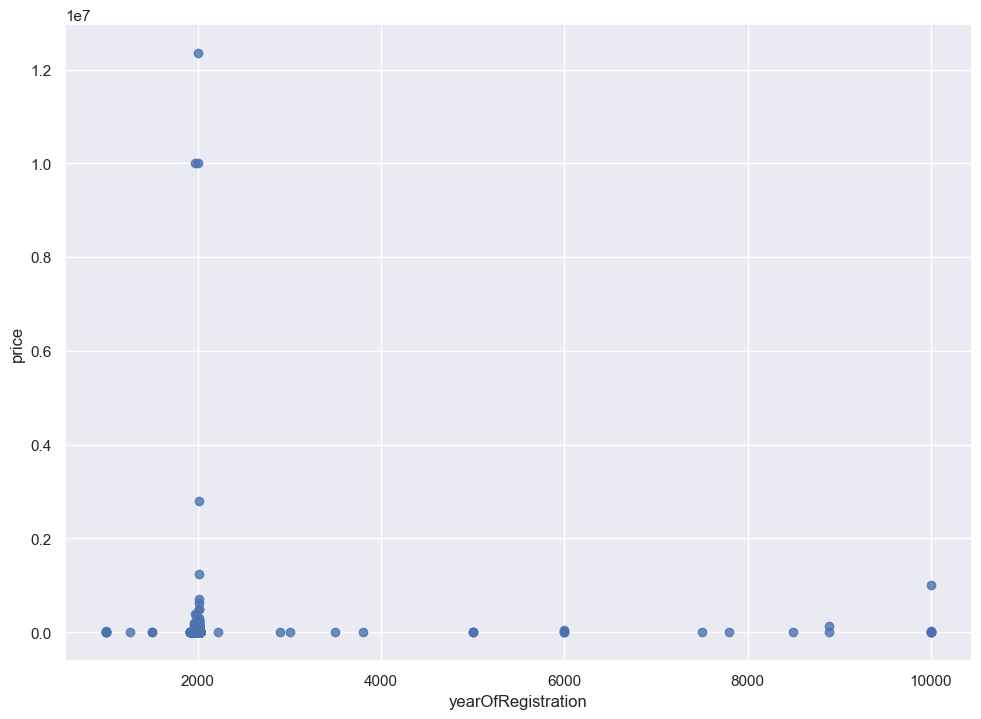

In [531]:
sns.regplot(x = 'yearOfRegistration', y = 'price', # reconfirm
            scatter = True,
            fit_reg = False,
            data = cars)
#working range is 1950 - 2018

In [532]:
# 2. Variable price
# Looking through the number of records in each price range
price_count = cars['price'].value_counts().sort_index()

In [533]:
pd.set_option('display.max_rows', 60)

price_count

0           1415
1            172
2              1
3              1
5              4
            ... 
1250000        1
2795000        1
9999999        1
10010011       1
12345678       1
Name: price, Length: 2393, dtype: int64

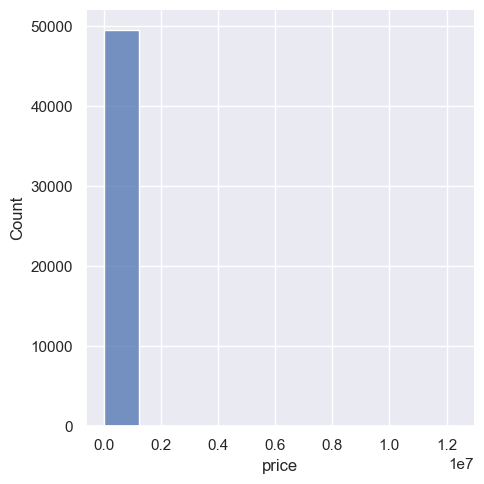

In [534]:
sns.displot(x = 'price', 
            bins = 10, 
            data = cars)

In [535]:
cars['price'].describe()

count      49531.000
mean        6567.220
std        86222.378
min            0.000
25%         1150.000
50%         2950.000
75%         7100.000
max     12345678.000
Name: price, dtype: float64

<AxesSubplot: ylabel='price'>

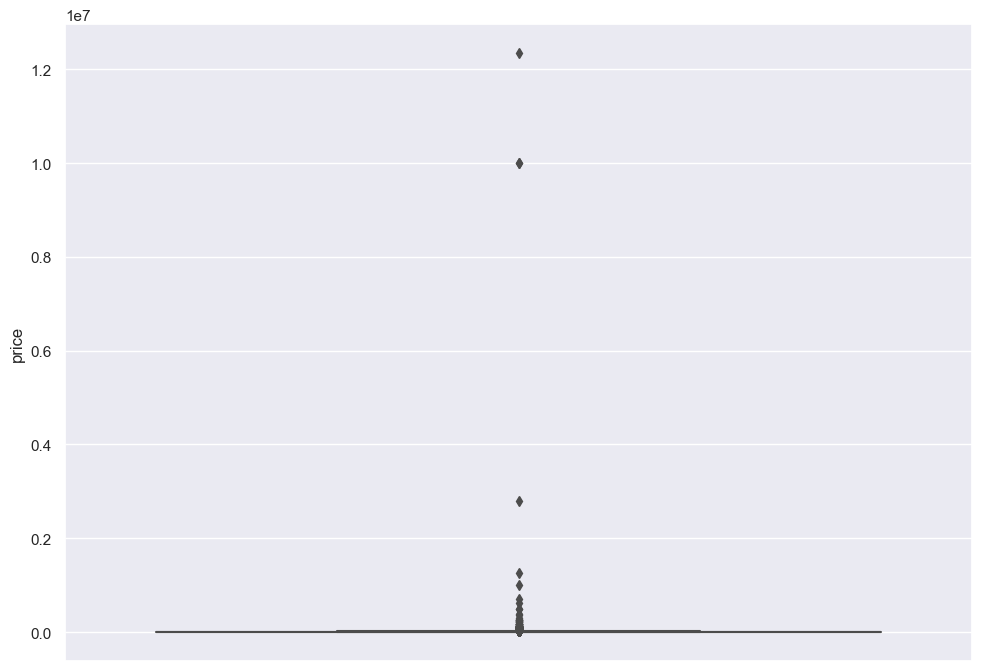

In [536]:
sns.boxplot(y = cars['price'])

In [538]:
print(sum(cars['price'] < 100))
print(sum(cars['price'] > 150000))
# Working range can be determined as 100 - 150000

1748
34


In [539]:
# 3. Variable powerPS
# Looking for the number of cars in each powerPS
power_count = cars['powerPS'].value_counts().sort_index()

In [540]:
power_count

0        5533
1           3
2           2
3           2
4           4
         ... 
15033       1
16011       1
16312       1
19211       1
19312       1
Name: powerPS, Length: 460, dtype: int64

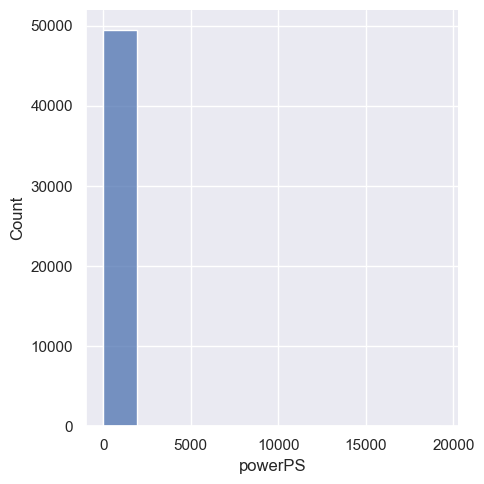

In [541]:
sns.displot(cars['powerPS'], bins = 10)

In [542]:
cars['powerPS'].describe()

count   49531.000
mean      116.501
std       231.536
min         0.000
25%        69.000
50%       105.000
75%       150.000
max     19312.000
Name: powerPS, dtype: float64

<AxesSubplot: xlabel='powerPS', ylabel='price'>

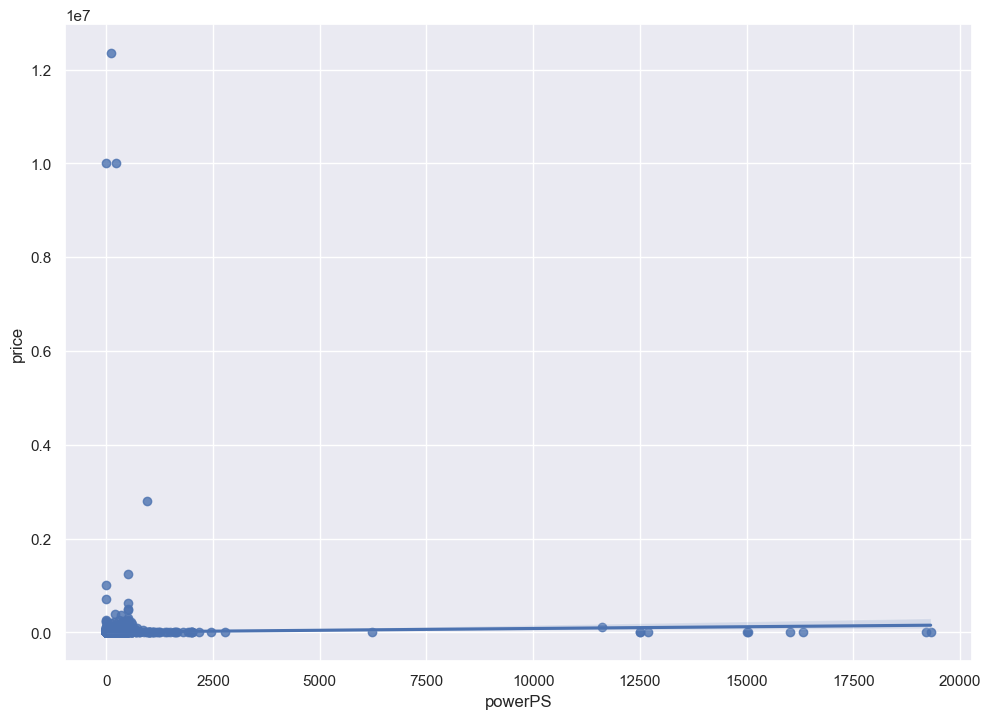

In [543]:
sns.regplot(x = 'powerPS', 
            y = 'price', 
            scatter = True, 
            data = cars)

<AxesSubplot: >

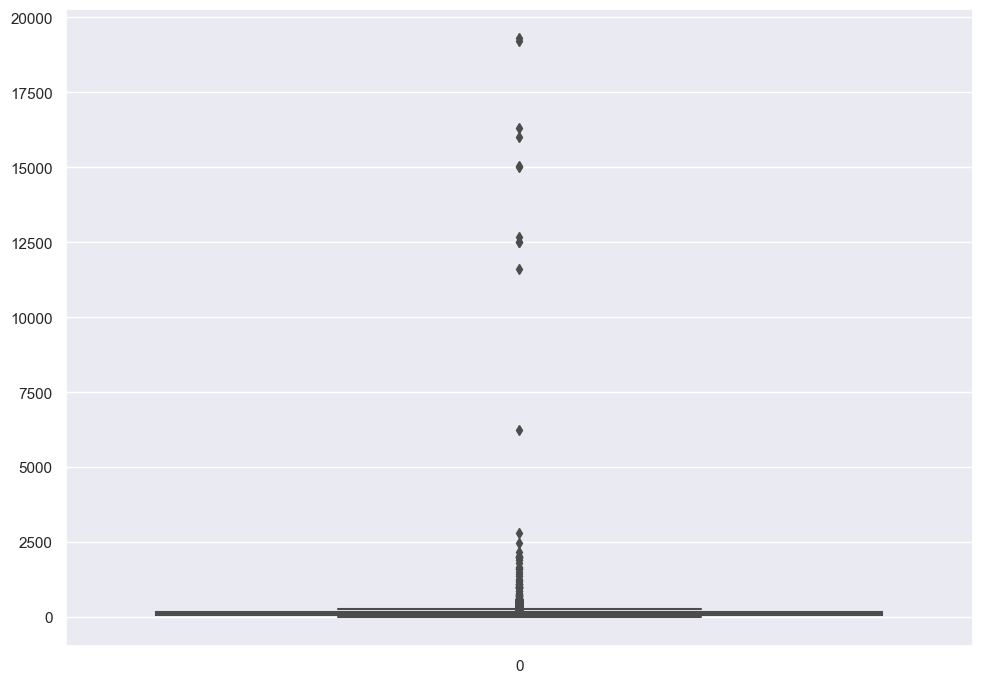

In [544]:
sns.boxplot(cars['powerPS'])

In [545]:
print(sum(cars['powerPS'] > 500))
print(sum(cars['powerPS'] < 10))
# Working range - 10 to 500

115
5565


In [546]:
cars.skew()

C:\Users\acer\AppData\Local\Temp\ipykernel_13340\3141738871.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  cars.skew()


price                 122.955
yearOfRegistration     55.652
powerPS                59.549
kilometer              -1.560
monthOfRegistration     0.075
dtype: float64

In [547]:
##### Working on the Cleaning of data ######

cars_cld = cars[
        (cars.yearOfRegistration <= 2018)&
        (cars.yearOfRegistration >= 1950)&
        (cars.price >= 100)&
        (cars.price <= 150000)&
        (cars.powerPS >= 10)&
        (cars.powerPS <= 500)]
# ~6700 records are dropped

In [548]:
cars_cld

,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
0,private,offer,4450,test,limousine,2003,manual,150,3er,150000,3,diesel,bmw,NaN
1,private,offer,13299,control,suv,2005,manual,163,xc_reihe,150000,6,diesel,volvo,no
2,private,offer,3200,test,bus,2003,manual,101,touran,150000,11,diesel,volkswagen,NaN
3,private,offer,4500,control,small car,2006,manual,86,ibiza,60000,12,petrol,seat,no
4,private,offer,18750,test,suv,2008,automatic,185,xc_reihe,150000,11,diesel,volvo,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49991,private,offer,10900,test,limousine,2004,manual,231,x_reihe,150000,8,petrol,bmw,no
49992,private,offer,790,test,limousine,1998,manual,82,astra,150000,9,diesel,opel,no
49993,private,offer,830,test,small car,1999,manual,60,clio,125000,8,petrol,renault,no
49995,private,offer,2290,test,station wagon,2001,manual,101,astra,150000,3,petrol,opel,no


In [549]:
#Further to simplify - variable reduction
#Combining yearOfRegistration and monthOfRegistration
cars_cld['monthOfRegistration'] /= 12

C:\Users\acer\AppData\Local\Temp\ipykernel_13340\2641240570.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars_cld['monthOfRegistration'] /= 12


In [550]:
# Creating new variable Age by adding yearOfRegistration to monthOfRegistration
cars_cld['Age'] = (2018-cars['yearOfRegistration'] + cars['monthOfRegistration'])

C:\Users\acer\AppData\Local\Temp\ipykernel_13340\1590975379.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars_cld['Age'] = (2018-cars['yearOfRegistration'] + cars['monthOfRegistration'])


In [551]:
cars_cld

,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,Age
0,private,offer,4450,test,limousine,2003,manual,150,3er,150000,0.250,diesel,bmw,NaN,18
1,private,offer,13299,control,suv,2005,manual,163,xc_reihe,150000,0.500,diesel,volvo,no,19
2,private,offer,3200,test,bus,2003,manual,101,touran,150000,0.917,diesel,volkswagen,NaN,26
3,private,offer,4500,control,small car,2006,manual,86,ibiza,60000,1.000,petrol,seat,no,24
4,private,offer,18750,test,suv,2008,automatic,185,xc_reihe,150000,0.917,diesel,volvo,no,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49991,private,offer,10900,test,limousine,2004,manual,231,x_reihe,150000,0.667,petrol,bmw,no,22
49992,private,offer,790,test,limousine,1998,manual,82,astra,150000,0.750,diesel,opel,no,29
49993,private,offer,830,test,small car,1999,manual,60,clio,125000,0.667,petrol,renault,no,27
49995,private,offer,2290,test,station wagon,2001,manual,101,astra,150000,0.250,petrol,opel,no,20


In [552]:
cars_cld['Age'].describe()

count   42772.000
mean       20.369
std         7.874
min         0.000
25%        15.000
50%        20.000
75%        25.000
max        76.000
Name: Age, dtype: float64

In [553]:
#dropping yearOfRegistration and monthOfRegistration
cars_cld.drop(columns = ['yearOfRegistration', 'monthOfRegistration'], axis = 1)

,seller,offerType,price,abtest,vehicleType,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,Age
0,private,offer,4450,test,limousine,manual,150,3er,150000,diesel,bmw,NaN,18
1,private,offer,13299,control,suv,manual,163,xc_reihe,150000,diesel,volvo,no,19
2,private,offer,3200,test,bus,manual,101,touran,150000,diesel,volkswagen,NaN,26
3,private,offer,4500,control,small car,manual,86,ibiza,60000,petrol,seat,no,24
4,private,offer,18750,test,suv,automatic,185,xc_reihe,150000,diesel,volvo,no,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49991,private,offer,10900,test,limousine,manual,231,x_reihe,150000,petrol,bmw,no,22
49992,private,offer,790,test,limousine,manual,82,astra,150000,diesel,opel,no,29
49993,private,offer,830,test,small car,manual,60,clio,125000,petrol,renault,no,27
49995,private,offer,2290,test,station wagon,manual,101,astra,150000,petrol,opel,no,20


## Visualizing Parameters

In [554]:
cars_cld.dtypes.value_counts()

object     9
int64      5
float64    1
dtype: int64

In [555]:
cars_cld.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42772 entries, 0 to 50000
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   seller               42772 non-null  object 
 1   offerType            42772 non-null  object 
 2   price                42772 non-null  int64  
 3   abtest               42772 non-null  object 
 4   vehicleType          39896 non-null  object 
 5   yearOfRegistration   42772 non-null  int64  
 6   gearbox              41978 non-null  object 
 7   powerPS              42772 non-null  int64  
 8   model                41089 non-null  object 
 9   kilometer            42772 non-null  int64  
 10  monthOfRegistration  42772 non-null  float64
 11  fuelType             40175 non-null  object 
 12  brand                42772 non-null  object 
 13  notRepairedDamage    36495 non-null  object 
 14  Age                  42772 non-null  int64  
dtypes: float64(1), int64(5), object(9)
m

<AxesSubplot: xlabel='Age', ylabel='Count'>

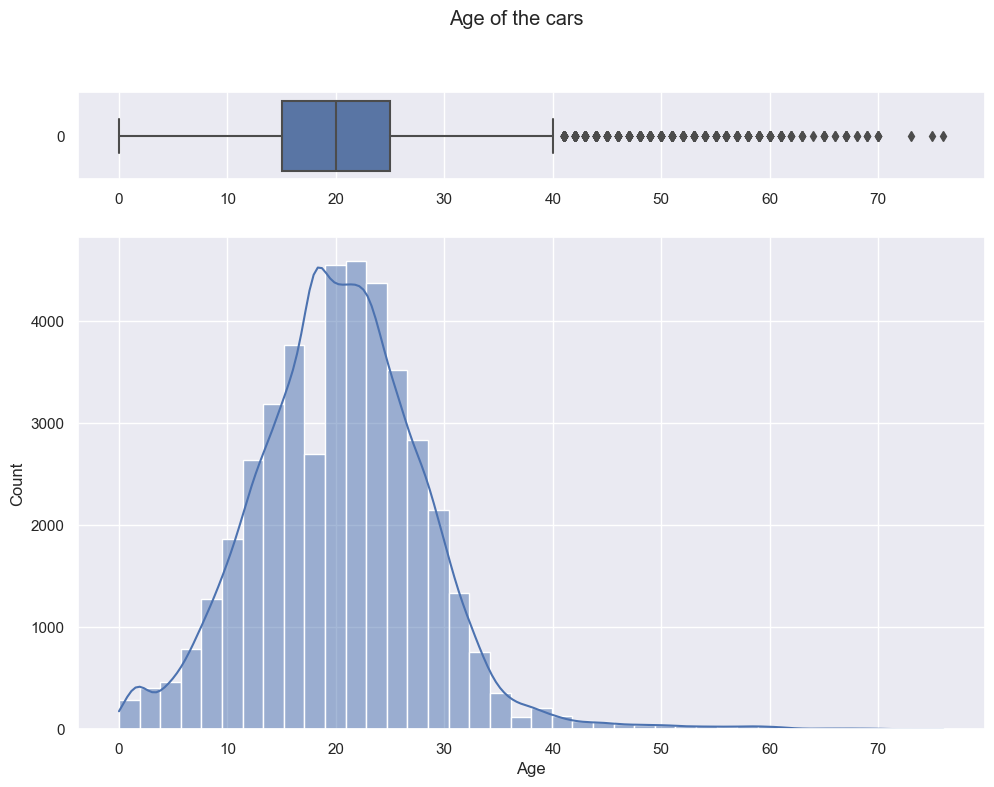

In [556]:
#Age
figure, (ax_box, ax_hist) = plt.subplots(2, gridspec_kw = {"height_ratios": (.15, .85)})
figure.suptitle('Age of the cars')
sns.boxplot(cars_cld['Age'], ax = ax_box, orient = 'h')
sns.histplot(cars_cld['Age'], bins = 40, kde = True, ax = ax_hist)

<AxesSubplot: >

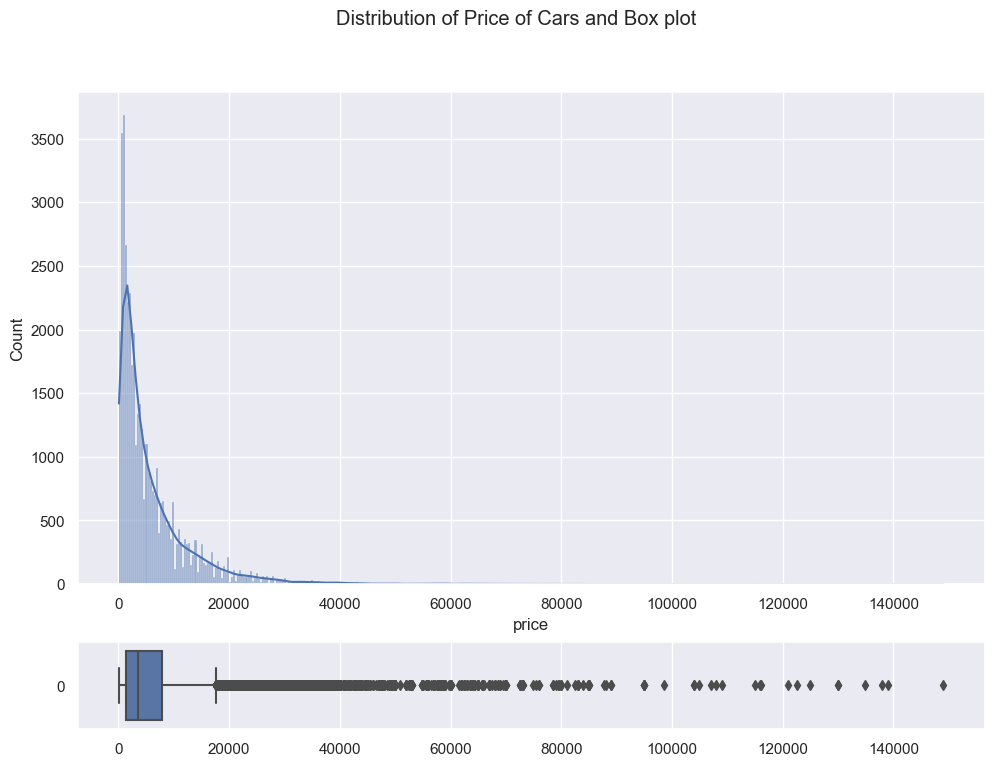

In [557]:
#price
f,(ax_hist,ax_box) = plt.subplots(2, gridspec_kw = {'height_ratios': (.85,.15)})
f.suptitle('Distribution of Price of Cars and Box plot')
sns.histplot(cars_cld['price'], ax = ax_hist, kde = True)
sns.boxplot(cars_cld['price'], ax = ax_box, orient = 'h')

<AxesSubplot: >

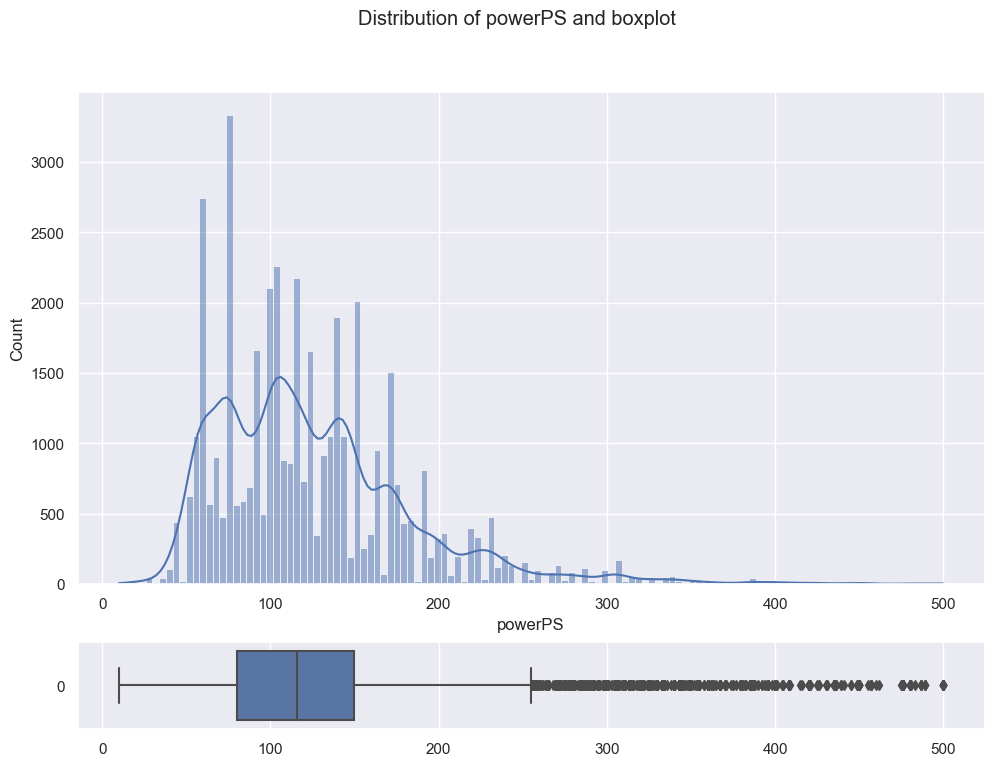

In [558]:
#powerPS
f,(ax_hist,ax_box) = plt.subplots(2, gridspec_kw = {'height_ratios': (.85,.15)})
f.suptitle("Distribution of powerPS and boxplot")
sns.histplot(cars_cld['powerPS'], ax = ax_hist, kde = True)
sns.boxplot(cars_cld['powerPS'], ax = ax_box, orient = 'h')

<AxesSubplot: xlabel='Age', ylabel='price'>

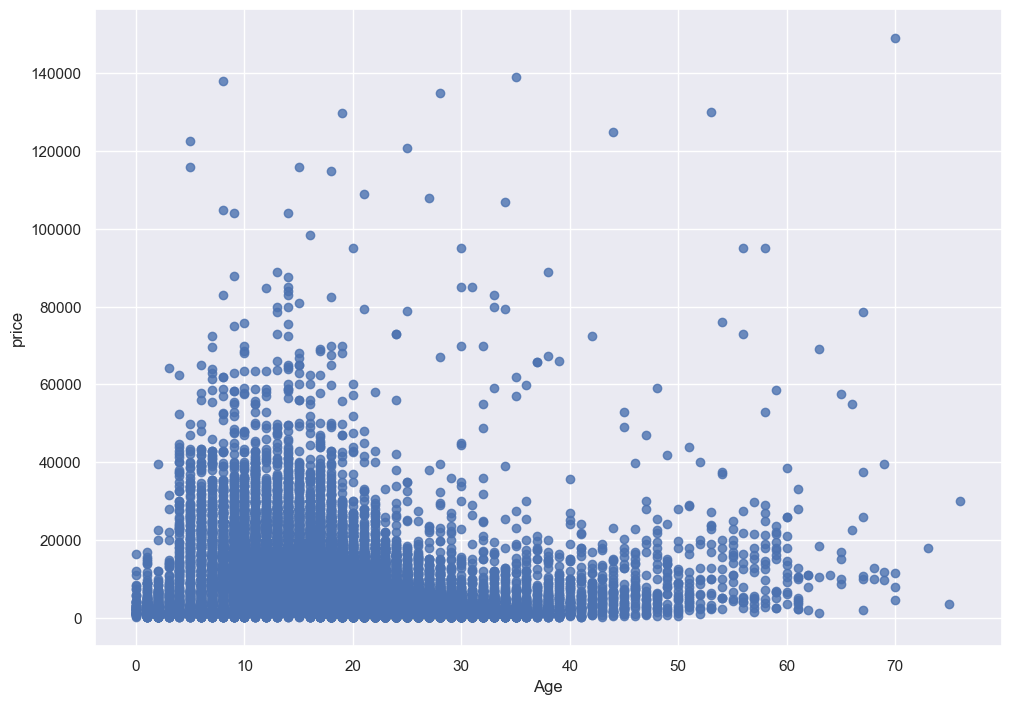

In [559]:
####Visualizing parameters after narrowing working range
# Age vs Price
sns.regplot(x = 'Age', y = 'price',
            scatter = True,
            fit_reg = False,
            data = cars_cld)

- Cars priced higher are newer
- With increase in age, price decreases
- However some cars are priced higher with increased age

<AxesSubplot: xlabel='powerPS', ylabel='price'>

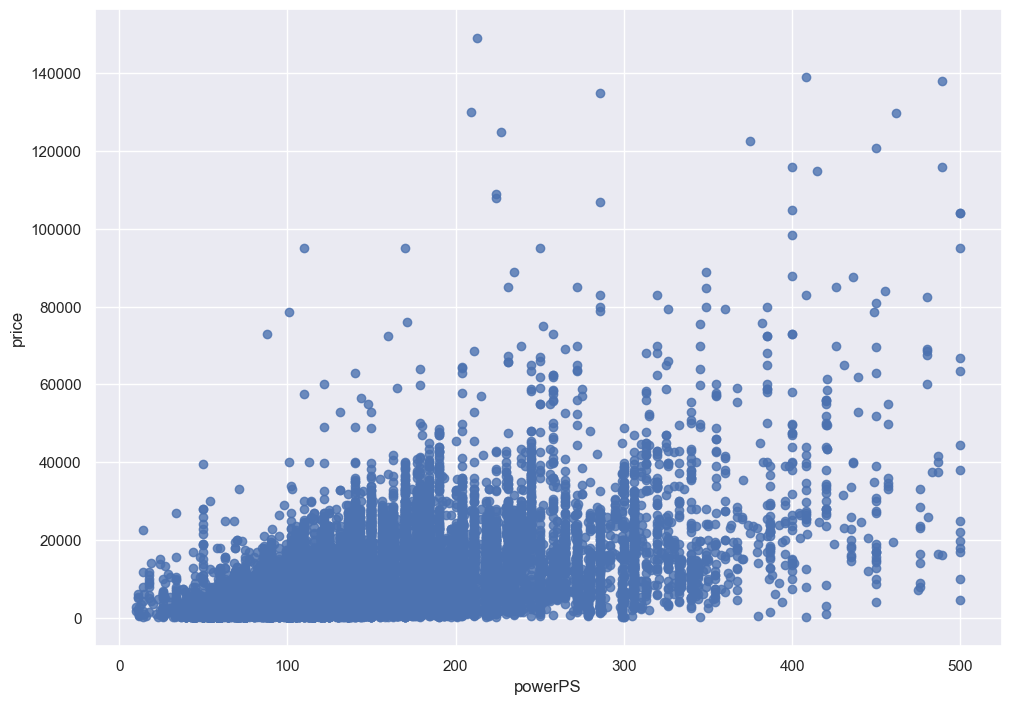

In [560]:
# powerPS vs price
sns.regplot(x = 'powerPS', y = 'price',
            scatter = True,
            fit_reg = False,
            data = cars_cld)

- Cars with more powerPS are priced higher
- But there are more cars of lower HP than higher

In [561]:
# Variable Seller
cars_cld['seller'].value_counts()

private       42771
commercial        1
Name: seller, dtype: int64

In [562]:
pd.crosstab(index = cars_cld['seller'],
            columns = 'count',
            normalize = True)

col_0,count
seller,
commercial,0.000
private,1.000


<AxesSubplot: xlabel='seller', ylabel='count'>

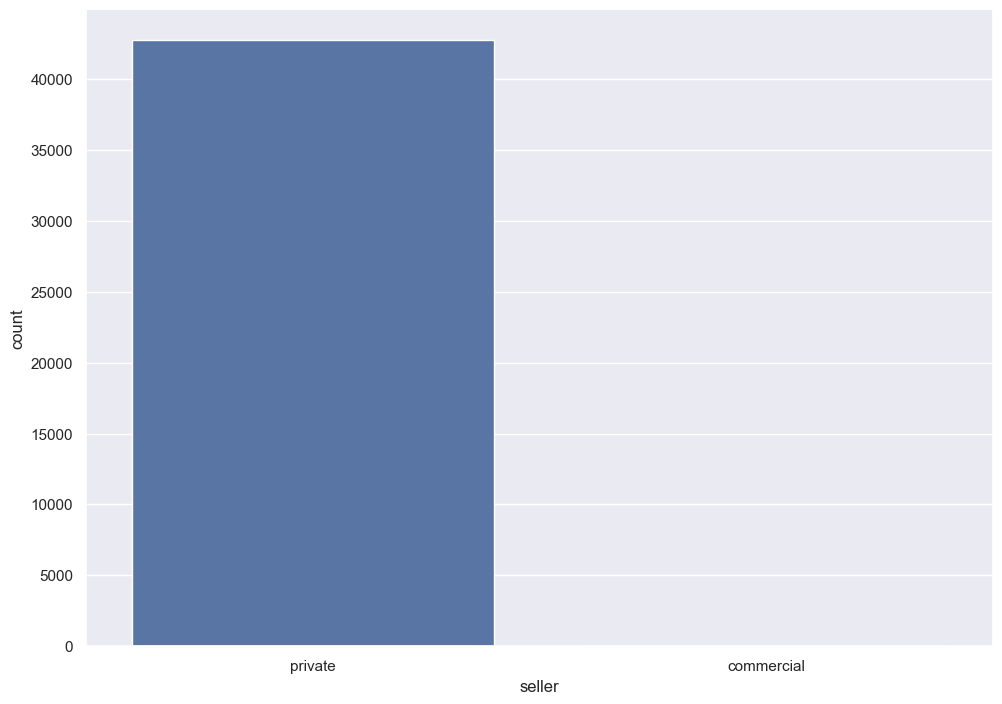

In [563]:
sns.countplot(x = 'seller', data = cars_cld)
#fewer cars have 'commercial' => Insignificant

In [564]:
# Variable offerType
cars_cld['offerType'].value_counts()

offer    42772
Name: offerType, dtype: int64

<AxesSubplot: xlabel='offerType', ylabel='count'>

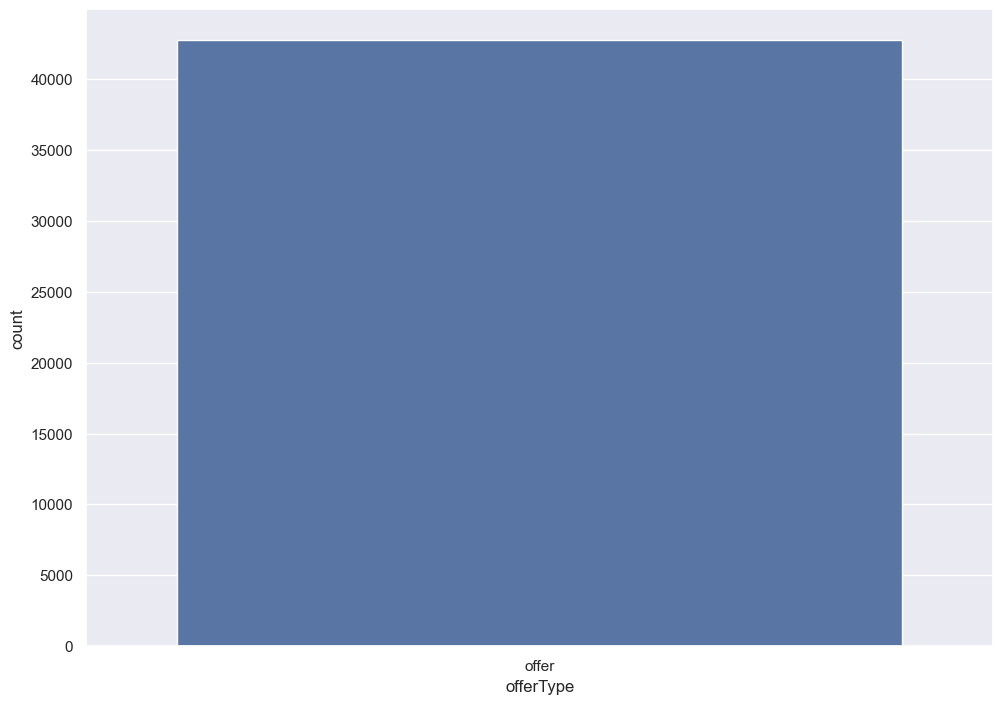

In [565]:
sns.countplot(x = 'offerType', data = cars_cld)
#All cars have 'offer' => Insignificant

In [566]:
# Variable abtest
cars['abtest'].value_counts()
pd.crosstab(index = cars_cld['abtest'],
            columns = 'count',
            normalize = True,
            margins = True)

col_0,count,All
abtest,,
control,0.483,0.483
test,0.517,0.517
All,1.000,1.000


<AxesSubplot: xlabel='abtest', ylabel='count'>

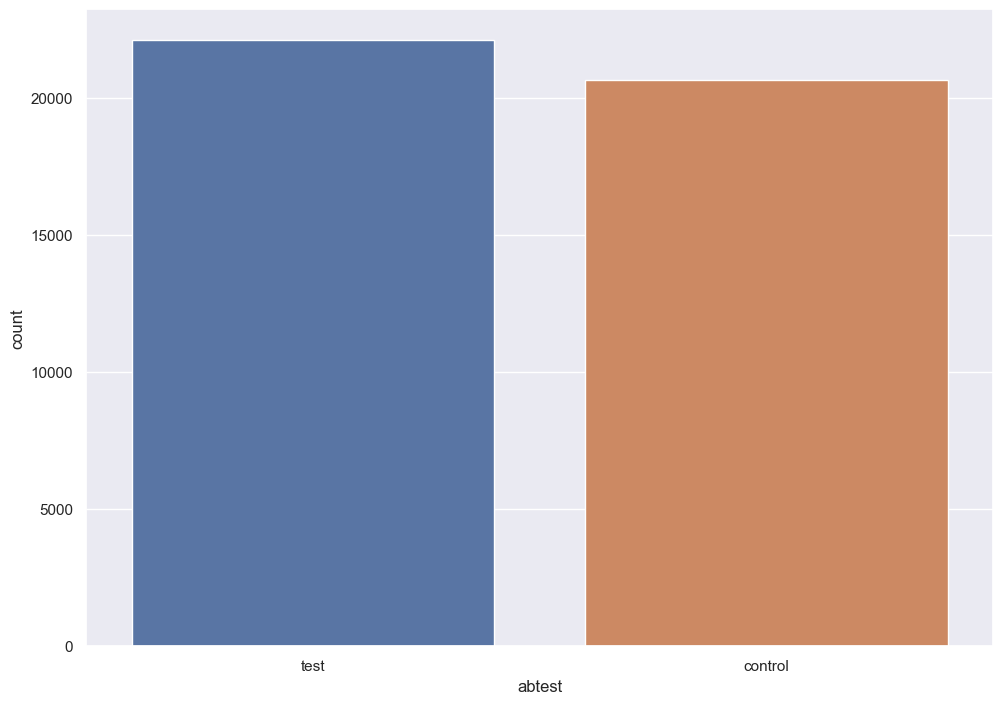

In [567]:
sns.countplot(x = cars_cld['abtest'])

<AxesSubplot: xlabel='abtest', ylabel='price'>

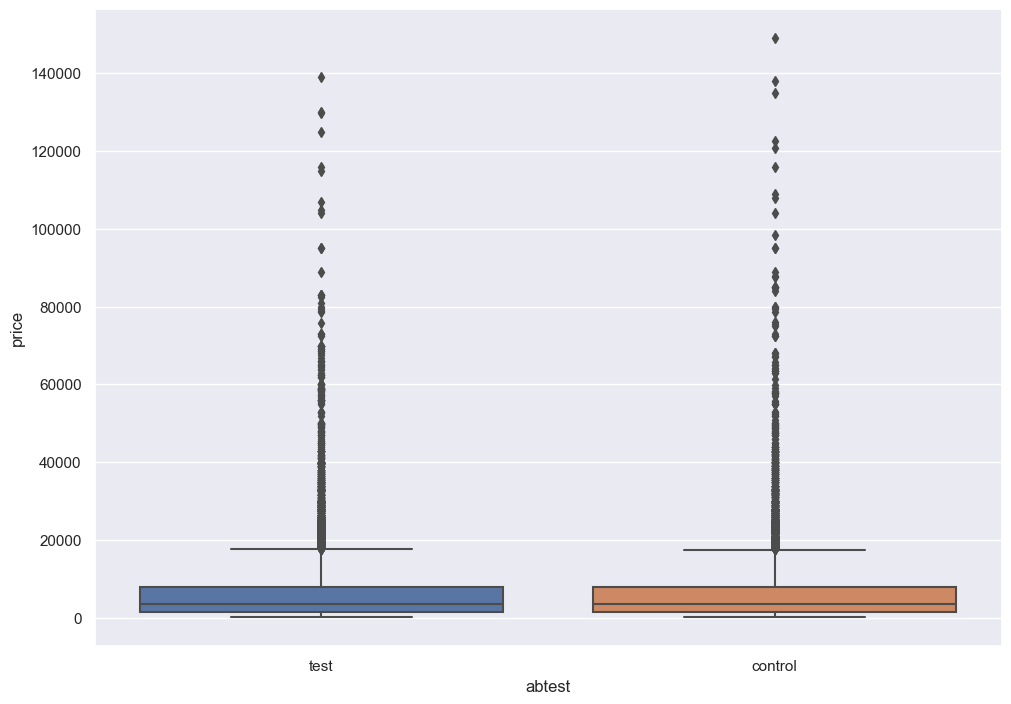

In [568]:
sns.boxplot(x = 'abtest', y = 'price', data = cars_cld)

In [569]:
# Variable vehicalType
cars['vehicleType'].value_counts()

limousine        12893
small car        10658
station wagon     8893
bus               3966
cabrio            3035
coupe             2519
suv               1977
others             438
Name: vehicleType, dtype: int64

In [570]:
pd.crosstab(index = cars_cld['vehicleType'],
            columns = 'count',
            normalize = True)

col_0,count
vehicleType,
bus,0.090
cabrio,0.070
coupe,0.057
limousine,0.294
others,0.008
small car,0.233
station wagon,0.202
suv,0.045


<AxesSubplot: xlabel='vehicleType', ylabel='count'>

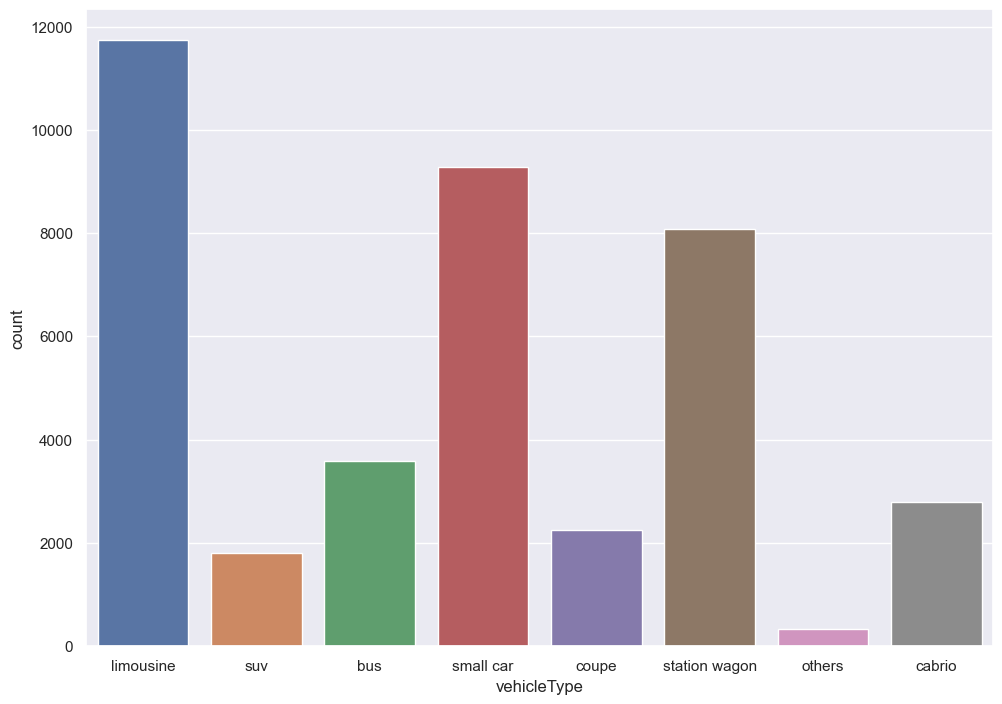

In [571]:
sns.countplot(x = cars_cld['vehicleType'])

<AxesSubplot: xlabel='vehicleType', ylabel='price'>

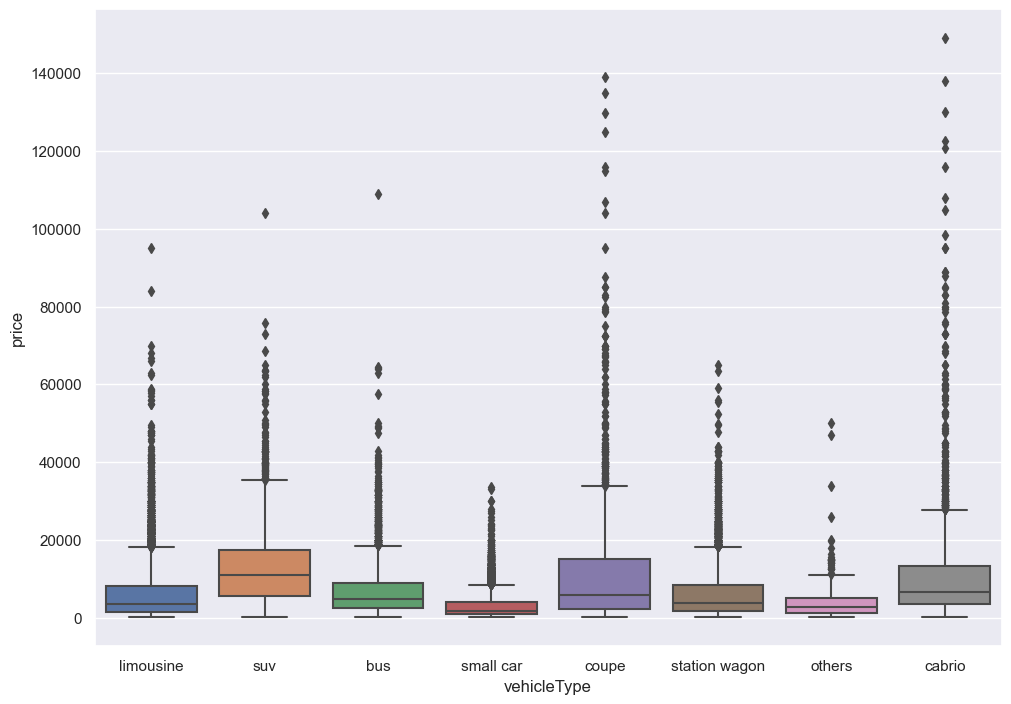

In [572]:
sns.boxplot(x = 'vehicleType',
            y = 'price',
            data = cars_cld)

- 8 Types of vehicle types are present
- They affect the price of the vehicle

In [573]:
# Variable gearbox
cars_cld['gearbox'].value_counts()

manual       32582
automatic     9396
Name: gearbox, dtype: int64

In [574]:
pd.crosstab(cars_cld['gearbox'],
            columns = 'count',
            normalize = True)

col_0,count
gearbox,
automatic,0.224
manual,0.776


<AxesSubplot: xlabel='gearbox', ylabel='count'>

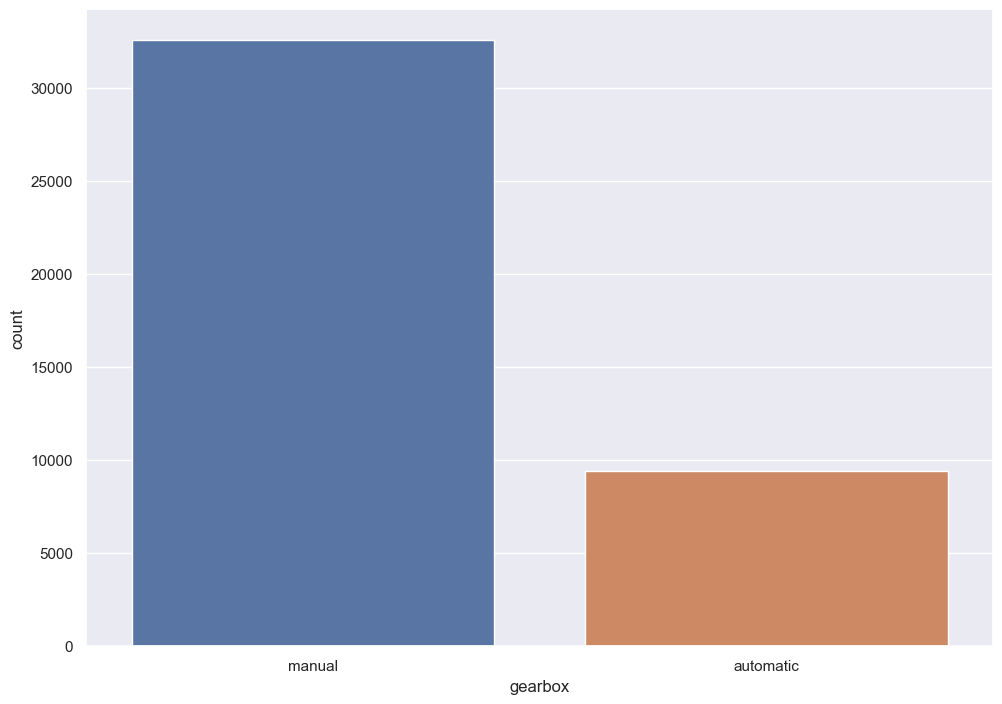

In [575]:
sns.countplot(x = cars_cld['gearbox'])

<AxesSubplot: xlabel='gearbox', ylabel='price'>

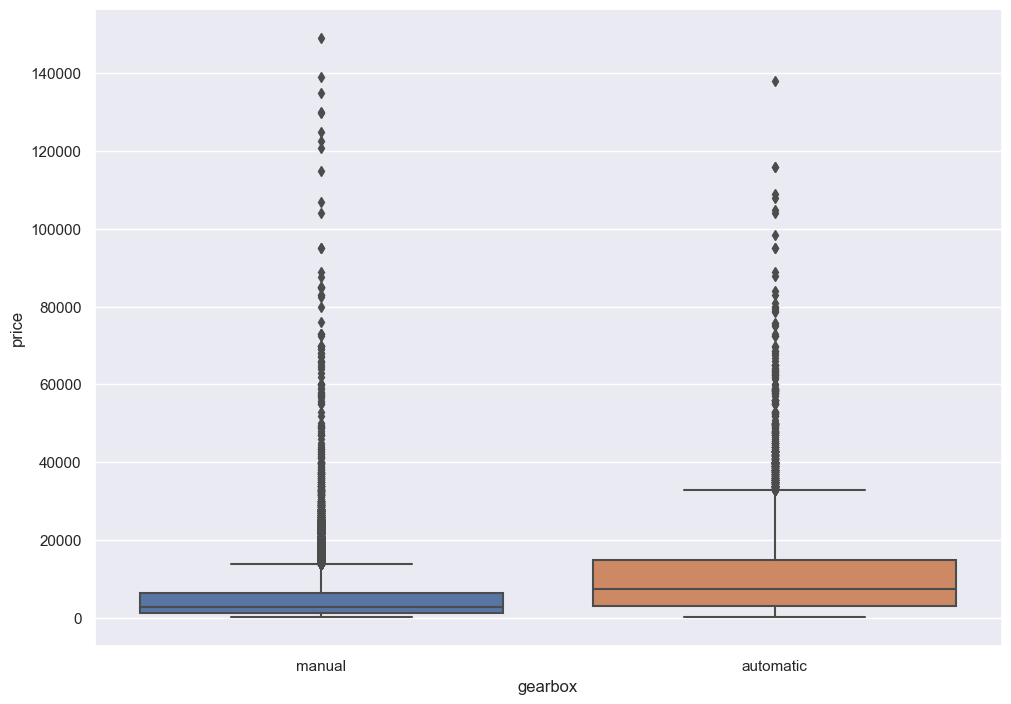

In [576]:
sns.boxplot(x = cars_cld['gearbox'],
            y = cars_cld['price'])

- GearBox does affects price of our vehicle

In [577]:
# Variable model
cars_cld['model'].value_counts()

golf          3478
others        2900
3er           2482
polo          1500
corsa         1386
              ... 
b_max            1
serie_3          1
elefantino       1
charade          1
rangerover       1
Name: model, Length: 247, dtype: int64

In [578]:
pd.crosstab(cars_cld['model'],
            columns = 'count',
            normalize = True)

col_0,count
model,
100,0.001
145,0.000
147,0.001
156,0.002
159,0.000
...,...
yaris,0.003
yeti,0.001
ypsilon,0.001


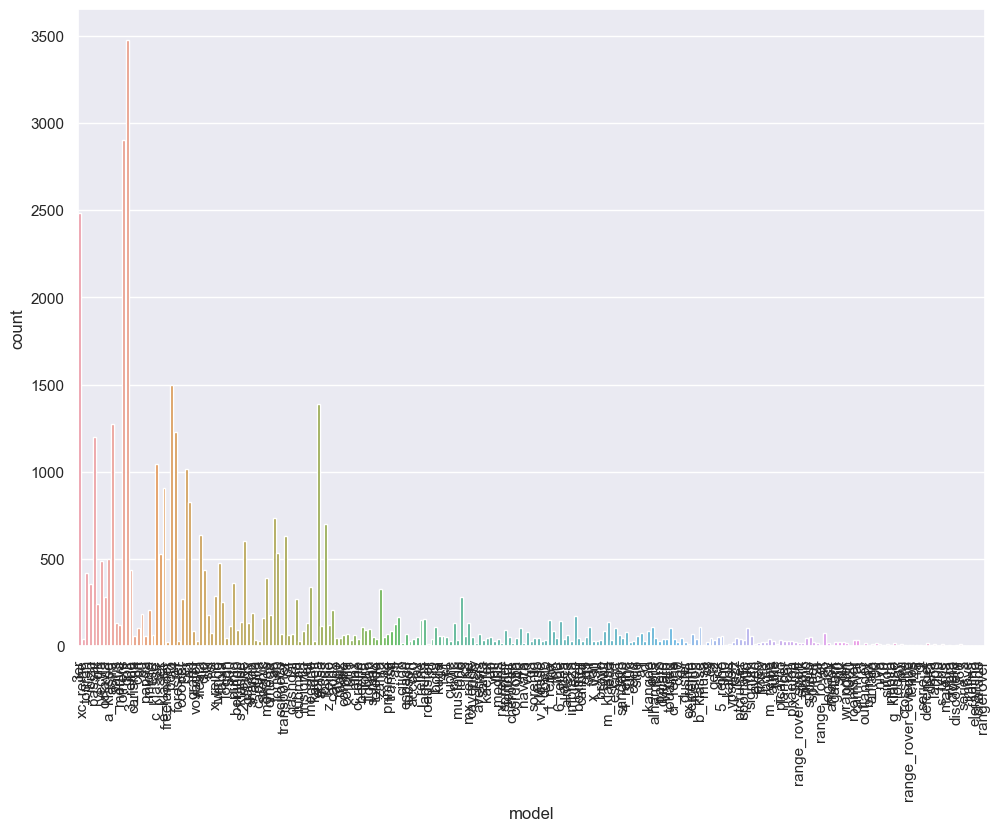

In [579]:
sns.countplot(x = cars_cld['model'])
plt.xticks(rotation = 'vertical')
plt.show()

<AxesSubplot: xlabel='model', ylabel='price'>

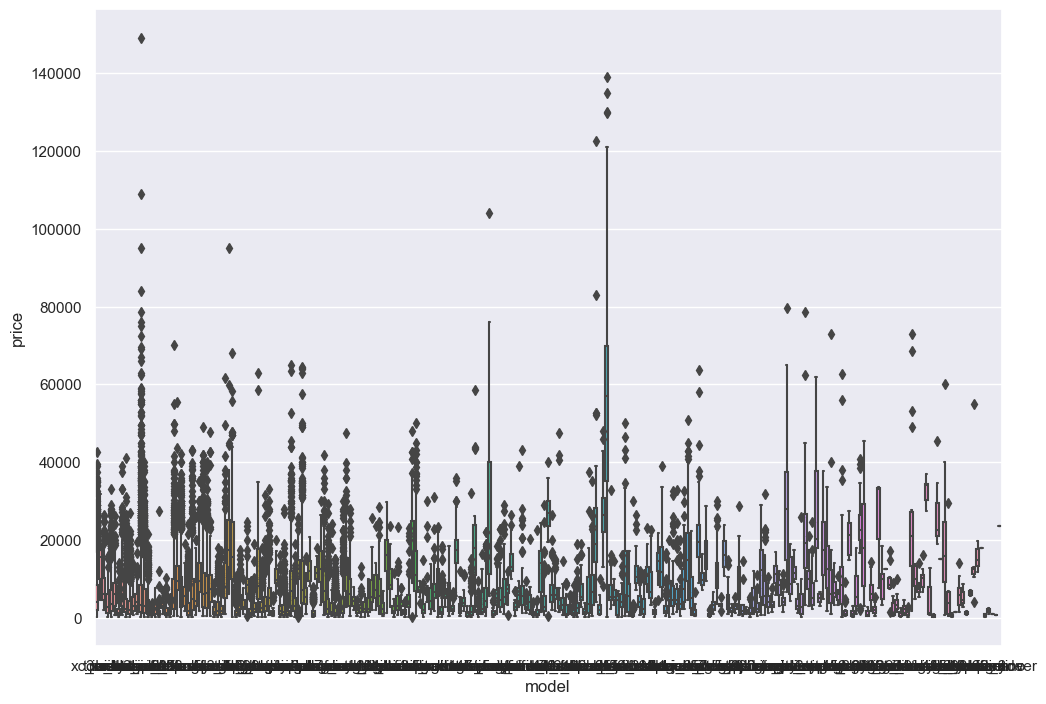

In [591]:
sns.boxplot(x = 'model',
            y = 'price',
            data = cars_cld)

- Cars are distributed over many models
- Considered in modelling

In [592]:
# Variable kilometer
cars_cld['kilometer'].value_counts().sort_index()

5000        479
10000       207
20000       651
30000       712
40000       795
50000       932
60000      1101
70000      1182
80000      1378
90000      1484
100000     1824
125000     4597
150000    27430
Name: kilometer, dtype: int64

In [593]:
pd.crosstab(cars_cld['kilometer'],
            columns = 'count',
            normalize = True)

col_0,count
kilometer,
5000,0.011
10000,0.005
20000,0.015
30000,0.017
40000,0.019
50000,0.022
60000,0.026
70000,0.028
80000,0.032


<AxesSubplot: xlabel='kilometer', ylabel='price'>

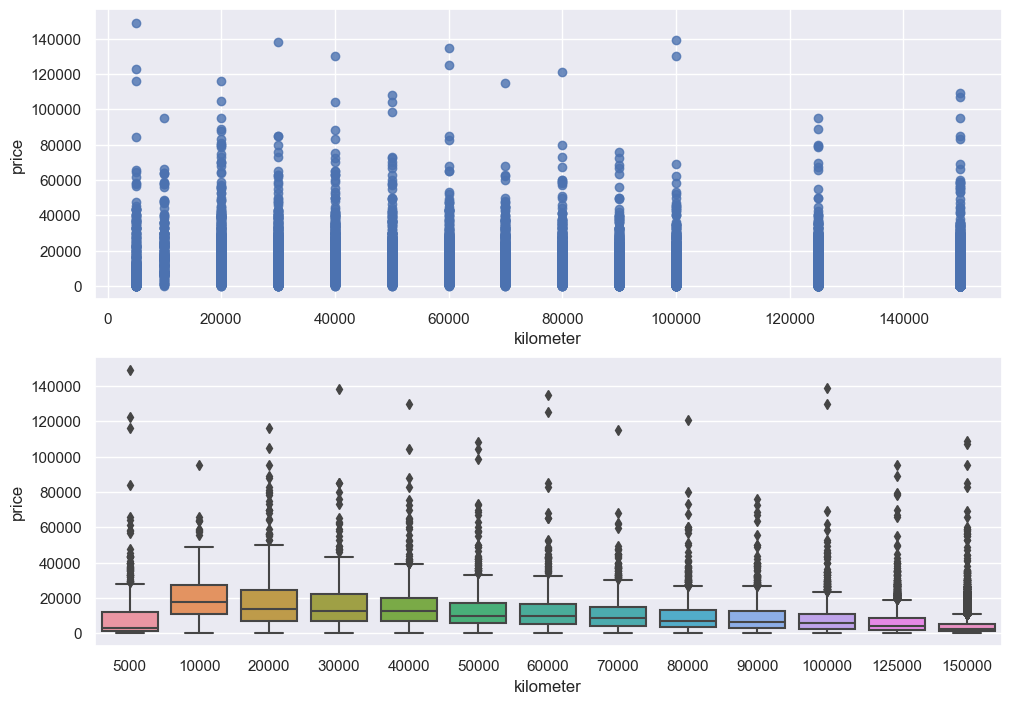

In [594]:
fig, (ax_reg, ax_box) = plt.subplots(2, gridspec_kw = {'height_ratios': (.50, .50)})
sns.boxplot(x = 'kilometer', y = 'price', data = cars_cld, ax = ax_box)
sns.regplot(x = 'kilometer', y = 'price', data = cars_cld, ax = ax_reg, fit_reg = False, scatter = True)

In [ ]:
# Variable fuelType
cars_cld['fuelType'].value_counts()

In [595]:
pd.crosstab(index = cars_cld['fuelType'],
            columns = 'count',
            normalize = True)

col_0,count
fuelType,
cng,0.002
diesel,0.320
electro,0.000
hybrid,0.001
lpg,0.017
other,0.000
petrol,0.660


<AxesSubplot: xlabel='fuelType', ylabel='count'>

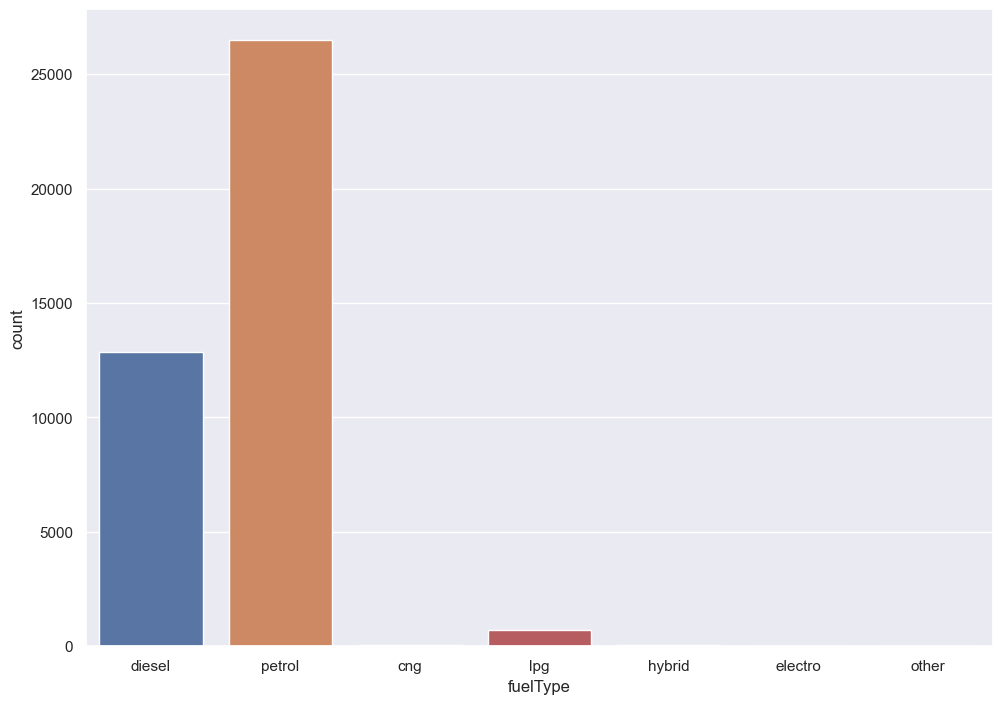

In [596]:
sns.countplot(x = cars_cld['fuelType'])

<AxesSubplot: xlabel='fuelType', ylabel='price'>

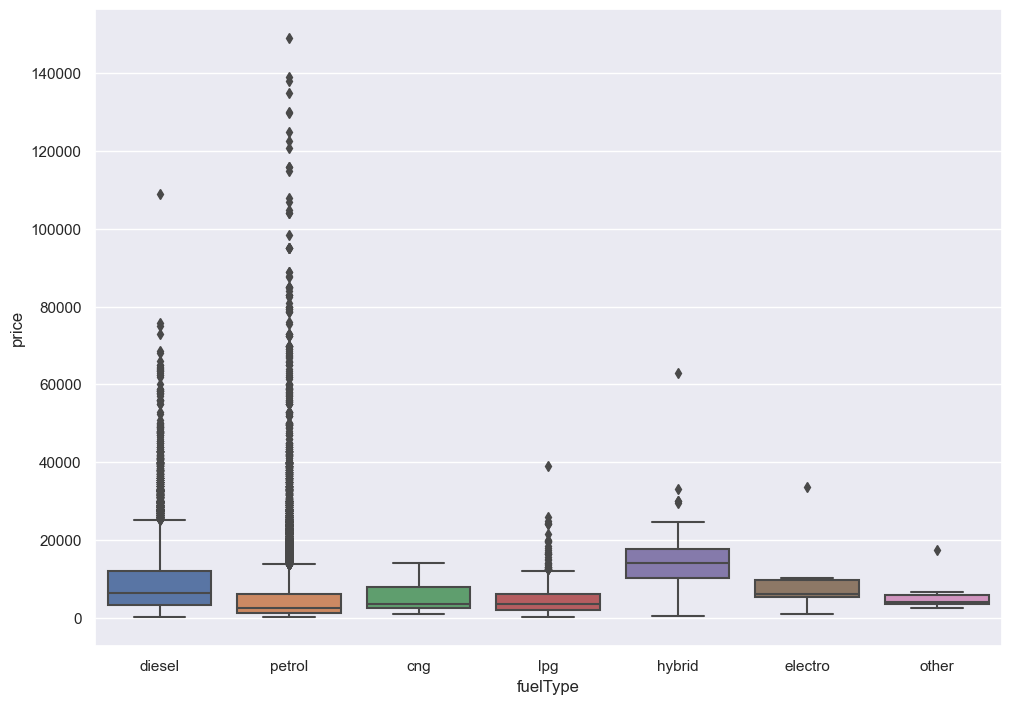

In [597]:
sns.boxplot(x = 'fuelType',
            y = 'price',
            data = cars_cld)

- Fuel Type Affects the price of the cars

In [598]:
# Variable Brand
cars_cld['brand'].value_counts()

volkswagen        9134
bmw               4868
opel              4487
mercedes_benz     4134
audi              3984
ford              2815
renault           1941
peugeot           1323
fiat               996
seat               886
skoda              698
mazda              663
smart              623
nissan             601
citroen            598
toyota             547
volvo              429
mini               428
hyundai            406
mitsubishi         359
honda              300
sonstige_autos     299
kia                276
suzuki             264
porsche            260
alfa_romeo         245
chevrolet          213
chrysler           151
dacia              123
subaru             112
jeep                91
land_rover          81
jaguar              78
daihatsu            67
saab                65
lancia              56
rover               53
daewoo              53
trabant             43
lada                22
Name: brand, dtype: int64

In [599]:
pd.crosstab(cars['brand'], columns = 'count', normalize = True)

col_0,count
brand,
alfa_romeo,0.006
audi,0.089
bmw,0.110
chevrolet,0.005
chrysler,0.004
citroen,0.014
dacia,0.003
daewoo,0.001
daihatsu,0.002


<AxesSubplot: xlabel='brand', ylabel='count'>

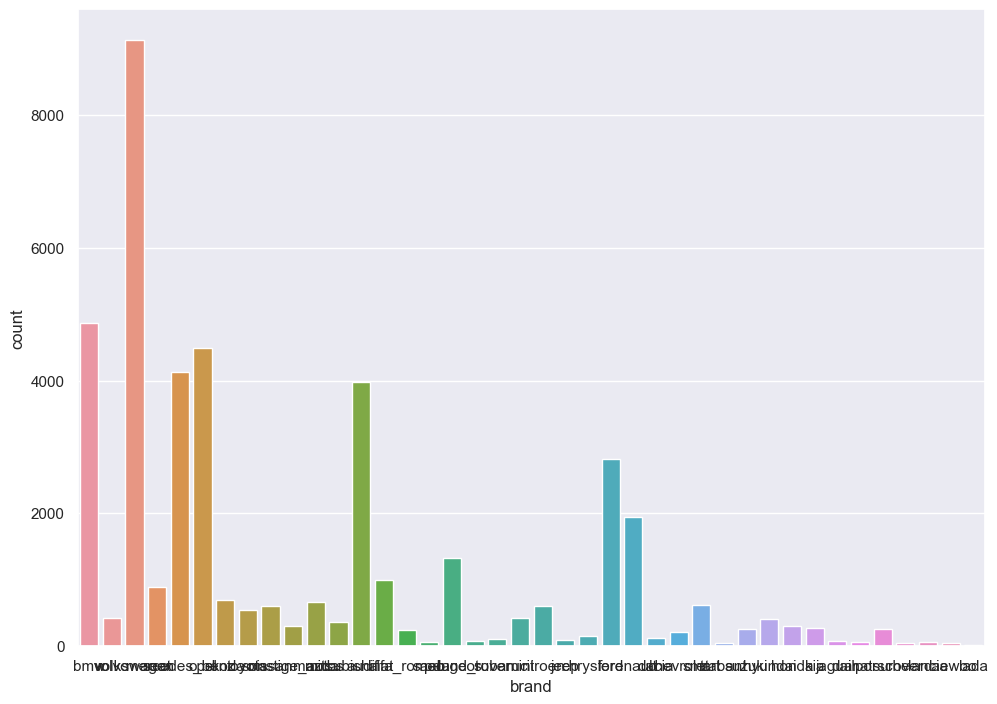

In [600]:
sns.countplot(x = cars_cld['brand'])

<AxesSubplot: xlabel='brand', ylabel='price'>

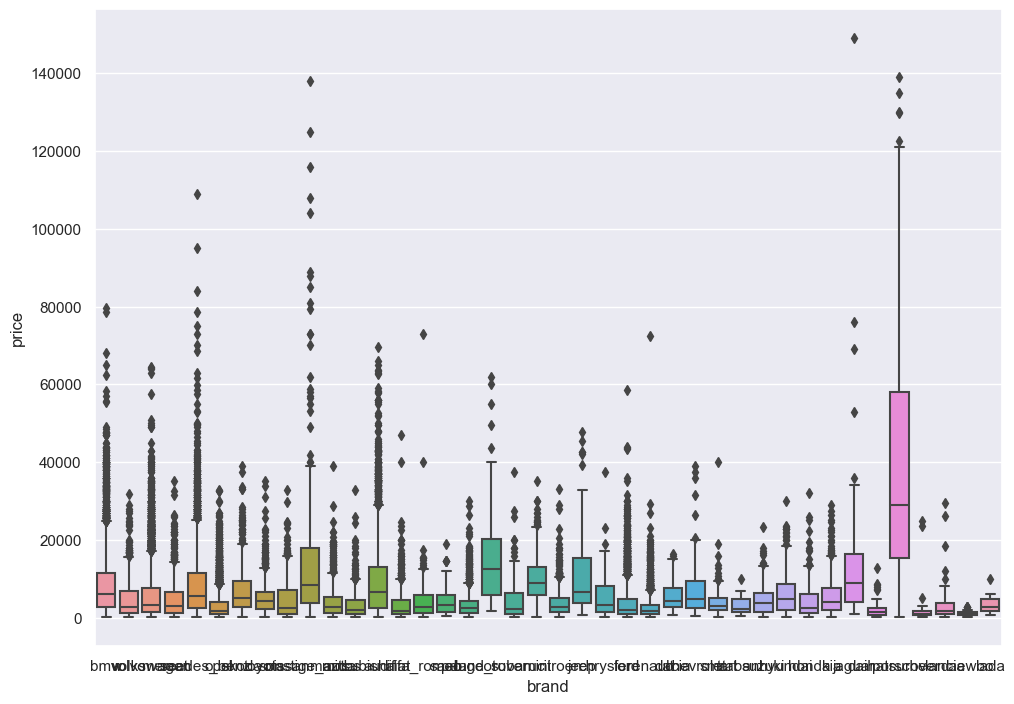

In [601]:
sns.boxplot(x = cars_cld['brand'], y = cars_cld['price'])

- Cars are distributes over many brands
- Considered for modelling

In [602]:
# Variable notRepairedDamage
cars_cld['notRepairedDamage'].value_counts()

no     32507
yes     3988
Name: notRepairedDamage, dtype: int64

In [603]:
pd.crosstab(cars_cld['notRepairedDamage'], columns = 'count', normalize = True)

col_0,count
notRepairedDamage,
no,0.891
yes,0.109


<AxesSubplot: xlabel='notRepairedDamage', ylabel='count'>

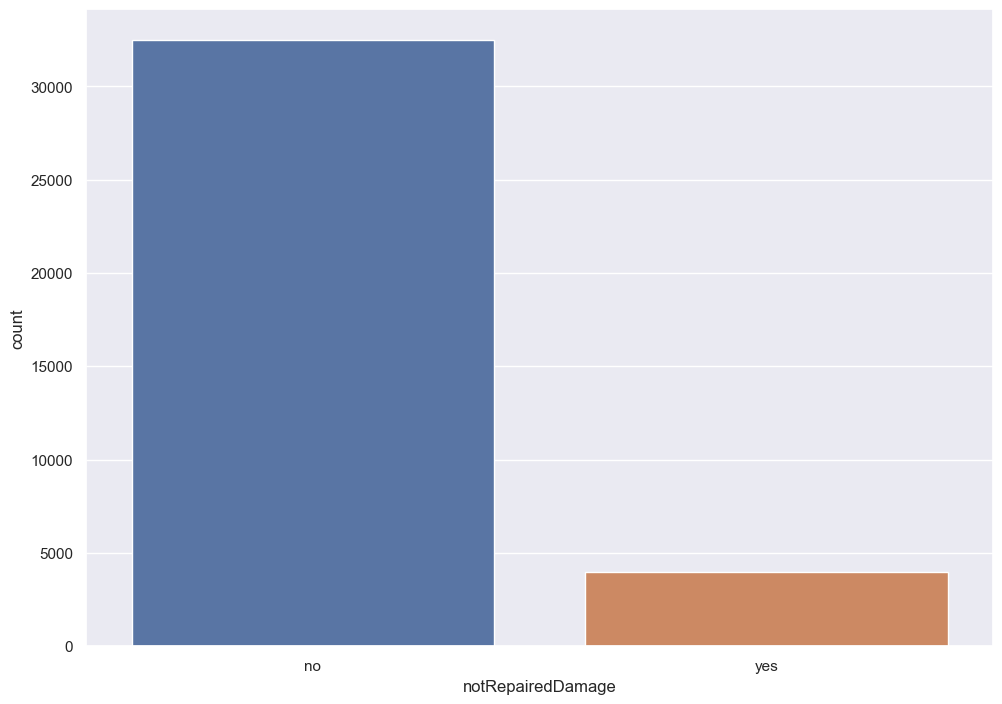

In [604]:
sns.countplot(x = cars_cld['notRepairedDamage'])

<AxesSubplot: xlabel='notRepairedDamage', ylabel='price'>

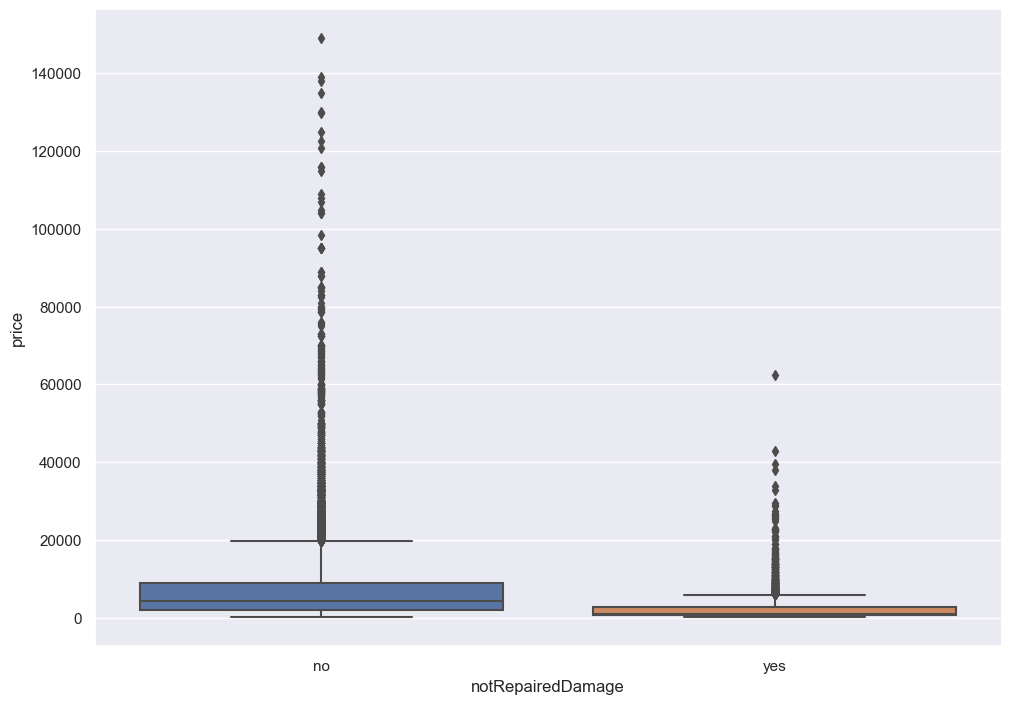

In [605]:
sns.boxplot(x = cars_cld['notRepairedDamage'], y = cars_cld['price'])

- As expected, the cars that require the damages to be repaired fall under the lower price ranges

## Removing insignificant variables

In [606]:
cars = cars_cld.drop(columns = ['seller', 'offerType', 'abtest', 'yearOfRegistration', 'monthOfRegistration'])

In [607]:
cars

,price,vehicleType,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,Age
0,4450,limousine,manual,150,3er,150000,diesel,bmw,NaN,18
1,13299,suv,manual,163,xc_reihe,150000,diesel,volvo,no,19
2,3200,bus,manual,101,touran,150000,diesel,volkswagen,NaN,26
3,4500,small car,manual,86,ibiza,60000,petrol,seat,no,24
4,18750,suv,automatic,185,xc_reihe,150000,diesel,volvo,no,21
...,...,...,...,...,...,...,...,...,...,...
49991,10900,limousine,manual,231,x_reihe,150000,petrol,bmw,no,22
49992,790,limousine,manual,82,astra,150000,diesel,opel,no,29
49993,830,small car,manual,60,clio,125000,petrol,renault,no,27
49995,2290,station wagon,manual,101,astra,150000,petrol,opel,no,20


<AxesSubplot: >

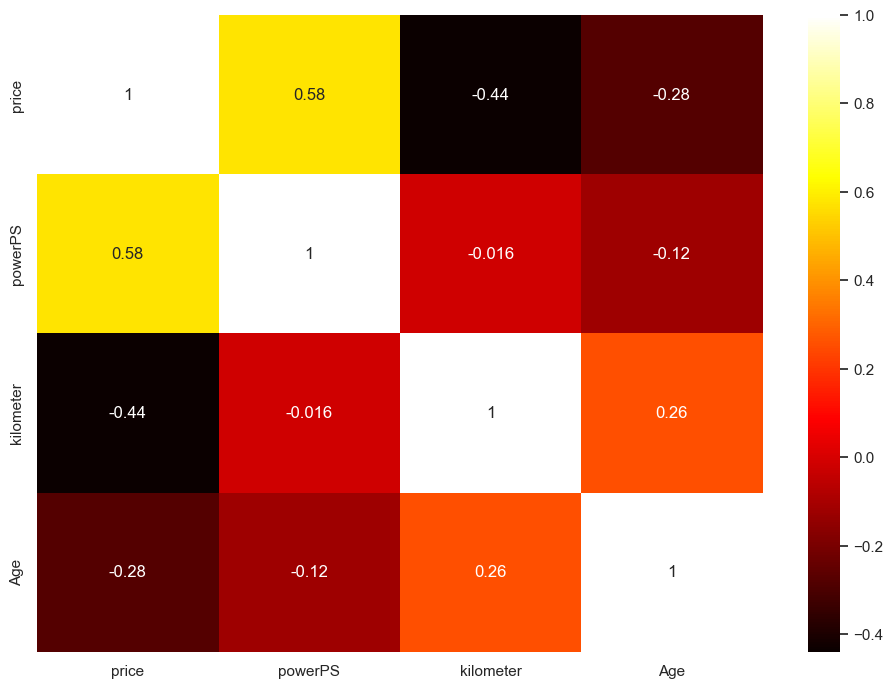

In [608]:
num_cars = cars.select_dtypes(exclude = 'object')
sns.heatmap(num_cars.corr(method = 'pearson'), cmap = 'hot', annot = True)

In [609]:
num_cars.corr().loc[:,'price'].abs().sort_values(ascending = False)[1:]

powerPS     0.575
kilometer   0.440
Age         0.282
Name: price, dtype: float64

# Model Building
We are going to build a Linear Regression and Random Forest model on two sets of data.
1. Data obtained by omitting rows with any missing value
2. Data obtained by imputing the missing values

### Omitting missing values

In [610]:
cars_omit = cars.dropna(axis = 0)

In [611]:
cars_omit.isna().sum()

price                0
vehicleType          0
gearbox              0
powerPS              0
model                0
kilometer            0
fuelType             0
brand                0
notRepairedDamage    0
Age                  0
dtype: int64

In [612]:
# Converting categorical variabls to dummy variables
cars_omit = pd.get_dummies(cars_omit, drop_first = True)

In [613]:
# Separating input and output features
x1 = cars_omit.drop(['price'],axis = 1, inplace = False)
y1 = cars_omit['price']

array([[<AxesSubplot: title={'center': '1. Before'}>,
        <AxesSubplot: title={'center': '2. After'}>]], dtype=object)

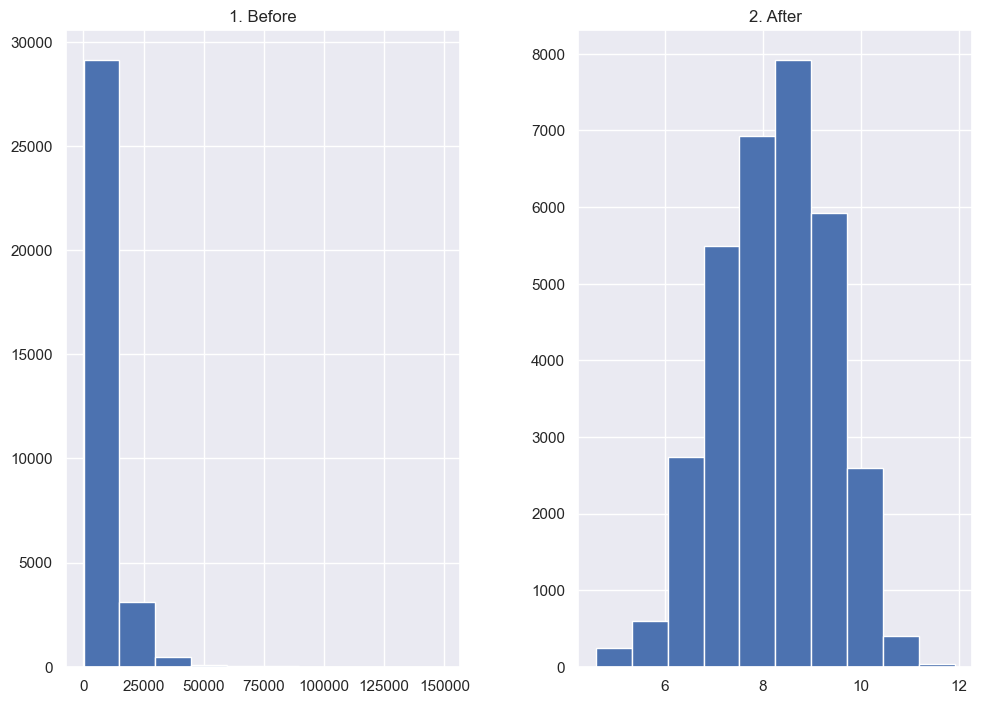

In [614]:
# Plotting the variable price
prices = pd.DataFrame({"1. Before" : y1, "2. After": np.log(y1)})
prices.hist()

In [615]:
# Transforming price as a lograthmic value
y1 = np.log(y1)

In [616]:
# Splitting data into test and train
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.3, random_state = 3)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(23018, 300) (9866, 300) (23018,) (9866,)


# Baseline Model for Omitted Data
We are making a base model by using test data mean value.
This is to set a benchmark and to compare with our regression model

In [617]:
# finding the mean for test data value
base_pred = np.mean(y_test)
base_pred

8.249615787653267

In [618]:
# Repeating same vale till length of test data
base_pred = np.repeat(base_pred, len(y_test))

In [619]:
base_pred

array([8.24961579, 8.24961579, 8.24961579, ..., 8.24961579, 8.24961579,
       8.24961579])

In [620]:
# finding the RMSE (root mean squared error)
base_rmse = np.sqrt(mean_squared_error(y_test, base_pred))
base_rmse

1.1274483657478247

### 1. Linear Regression model for omitted data

In [621]:
help(LinearRegression.predict)

Help on function predict in module sklearn.linear_model._base:

predict(self, X)
    Predict using the linear model.
    
    Parameters
    ----------
    X : array-like or sparse matrix, shape (n_samples, n_features)
        Samples.
    
    Returns
    -------
    C : array, shape (n_samples,)
        Returns predicted values.



In [622]:
# Setting intercept as true
lgr = LinearRegression(fit_intercept = True)

In [623]:
# Model
model_lin1 = lgr.fit(X_train,y_train)

In [624]:
# Predicting model on test set
cars_prediction_lin1 = lgr.predict(X_test)

In [625]:
# Computing MSE and RMSE
lin_mse1 = mean_squared_error(y_test, cars_prediction_lin1)
lin_rmse1 = np.sqrt(lin_mse1)
lin_rmse1

0.5826868976952345

In [626]:
lin_mse1

0.3395240207456967

In [627]:
# R Squared value - tells you how good is your model able to explain the variability in the y.
r2_lin_test1 = model_lin1.score(X_test, y_test)
r2_lin_train1 = model_lin1.score(X_train, y_train)

In [628]:
r2_lin_test1, r2_lin_train1

(0.7328979738571698, 0.7540856969497609)

count   9866.000
mean       0.005
std        0.583
min       -5.774
25%       -0.304
50%        0.045
75%        0.359
max        3.508
Name: price, dtype: float64

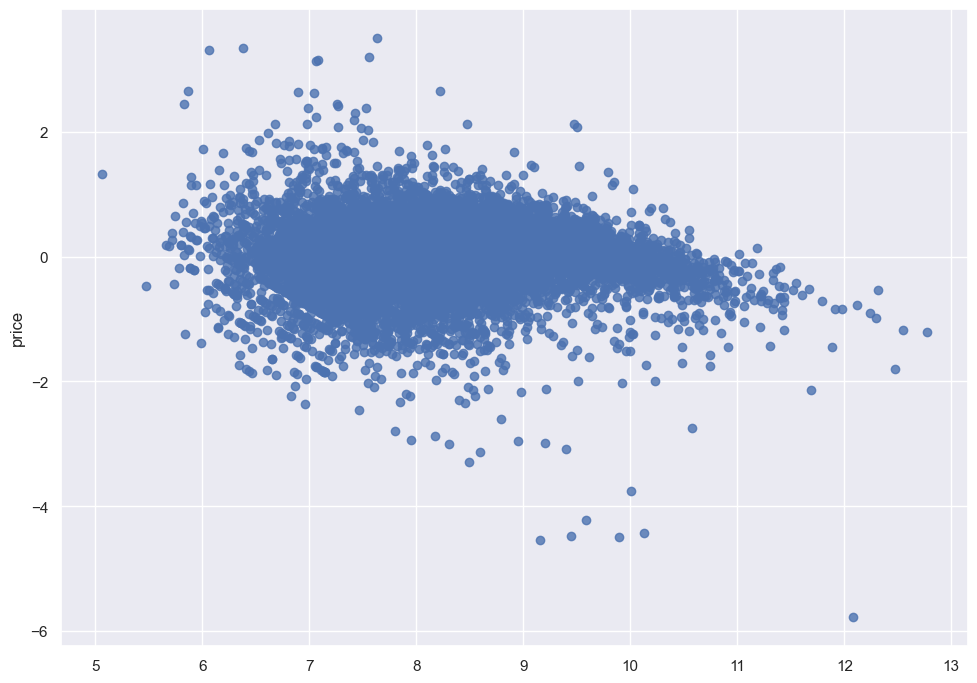

In [629]:
# Regression diagnostics - Residual plot analysis
residuals1 = y_test - cars_prediction_lin1
sns.regplot(x = cars_prediction_lin1, y = residuals1, scatter = True, 
            fit_reg = False)
residuals1.describe()

### Random Forest With Omitted Data

In [630]:
help(RandomForestRegressor)

Help on class RandomForestRegressor in module sklearn.ensemble._forest:

class RandomForestRegressor(ForestRegressor)
 |  RandomForestRegressor(n_estimators=100, *, criterion='squared_error', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=1.0, max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)
 |  
 |  A random forest regressor.
 |  
 |  A random forest is a meta estimator that fits a number of classifying
 |  decision trees on various sub-samples of the dataset and uses averaging
 |  to improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is controlled with the `max_samples` parameter if
 |  `bootstrap=True` (default), otherwise the whole dataset is used to build
 |  each tree.
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  Parameters
 |  ----------
 |  n_estimators 

In [631]:
# Model Parameters
rf = RandomForestRegressor(n_estimators = 100,
                           max_depth = 100, min_samples_split = 10,
                           min_samples_leaf = 4, random_state = 1)

In [632]:
# Model
model_rf1 = rf.fit(X_train, y_train)

In [633]:
# Predicting model on test set
cars_predictions_rf1 = rf.predict(X_test)

In [634]:
# Computing MSE and RMSE
rf_mse1 = mean_squared_error(y_test, cars_predictions_rf1)
rf_rmse1 = np.sqrt(rf_mse1)
rf_rmse1

0.5252721771024061

In [635]:
# R squared value
r2_rf_test1 = model_rf1.score(X_test, y_test)
r2_rf_train1 = model_rf1.score(X_train, y_train)
r2_rf_test1, r2_rf_train1

(0.7829421624158579, 0.8768975914822184)

# Model Building with Imputed Data

In [636]:
cars

,price,vehicleType,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,Age
0,4450,limousine,manual,150,3er,150000,diesel,bmw,NaN,18
1,13299,suv,manual,163,xc_reihe,150000,diesel,volvo,no,19
2,3200,bus,manual,101,touran,150000,diesel,volkswagen,NaN,26
3,4500,small car,manual,86,ibiza,60000,petrol,seat,no,24
4,18750,suv,automatic,185,xc_reihe,150000,diesel,volvo,no,21
...,...,...,...,...,...,...,...,...,...,...
49991,10900,limousine,manual,231,x_reihe,150000,petrol,bmw,no,22
49992,790,limousine,manual,82,astra,150000,diesel,opel,no,29
49993,830,small car,manual,60,clio,125000,petrol,renault,no,27
49995,2290,station wagon,manual,101,astra,150000,petrol,opel,no,20


In [637]:
cars.info(), cars.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42772 entries, 0 to 50000
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   price              42772 non-null  int64 
 1   vehicleType        39896 non-null  object
 2   gearbox            41978 non-null  object
 3   powerPS            42772 non-null  int64 
 4   model              41089 non-null  object
 5   kilometer          42772 non-null  int64 
 6   fuelType           40175 non-null  object
 7   brand              42772 non-null  object
 8   notRepairedDamage  36495 non-null  object
 9   Age                42772 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 4.6+ MB


(None,
 price                   0
 vehicleType          2876
 gearbox               794
 powerPS                 0
 model                1683
 kilometer               0
 fuelType             2597
 brand                   0
 notRepairedDamage    6277
 Age                     0
 dtype: int64)

In [638]:
cars['vehicleType'].mode()

0    limousine
Name: vehicleType, dtype: object

#### Imputing the missing values

In [639]:
cars['vehicleType'] = cars['vehicleType'].fillna(cars['vehicleType'].value_counts().index[0])

In [640]:
cars['gearbox'] = cars['gearbox'].fillna(cars['gearbox'].value_counts().index[0])

In [641]:
cars['model'] = cars['model'].fillna(cars['model'].value_counts().index[0])

In [642]:
cars['fuelType'] = cars['fuelType'].fillna(cars['fuelType'].value_counts().index[0])

In [643]:
cars['notRepairedDamage'] = cars['notRepairedDamage'].fillna(cars['notRepairedDamage'].value_counts().index[0])

In [644]:
##cars_imputed = cars.apply(lambda x : x.fillna(x.median()) if x.dtype == 'float' else x.filna(x.value_counts().index[0]))
cars_imputed.isnull().sum()

price                    0
powerPS                  0
kilometer                0
Age                      0
vehicleType_cabrio       0
                        ..
brand_toyota             0
brand_trabant            0
brand_volkswagen         0
brand_volvo              0
notRepairedDamage_yes    0
Length: 304, dtype: int64

In [645]:
cars_imputed = cars.copy(deep = True)

In [646]:
# Converting categorical variables to dummy variables
cars_imputed = pd.get_dummies(cars_imputed, drop_first = True)

In [647]:
cars_imputed

,price,powerPS,kilometer,Age,vehicleType_cabrio,vehicleType_coupe,vehicleType_limousine,vehicleType_others,vehicleType_small car,vehicleType_station wagon,...,brand_skoda,brand_smart,brand_sonstige_autos,brand_subaru,brand_suzuki,brand_toyota,brand_trabant,brand_volkswagen,brand_volvo,notRepairedDamage_yes
0,4450,150,150000,18,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,13299,163,150000,19,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,3200,101,150000,26,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4500,86,60000,24,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,18750,185,150000,21,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49991,10900,231,150000,22,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49992,790,82,150000,29,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49993,830,60,125000,27,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
49995,2290,101,150000,20,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


## Model Building

In [648]:
# Separating input and output features
x2 = cars_imputed.drop(['price'], axis = 1, inplace = False)
y2 = cars_imputed['price']

array([[<AxesSubplot: title={'center': '1. Before'}>,
        <AxesSubplot: title={'center': '2. After'}>]], dtype=object)

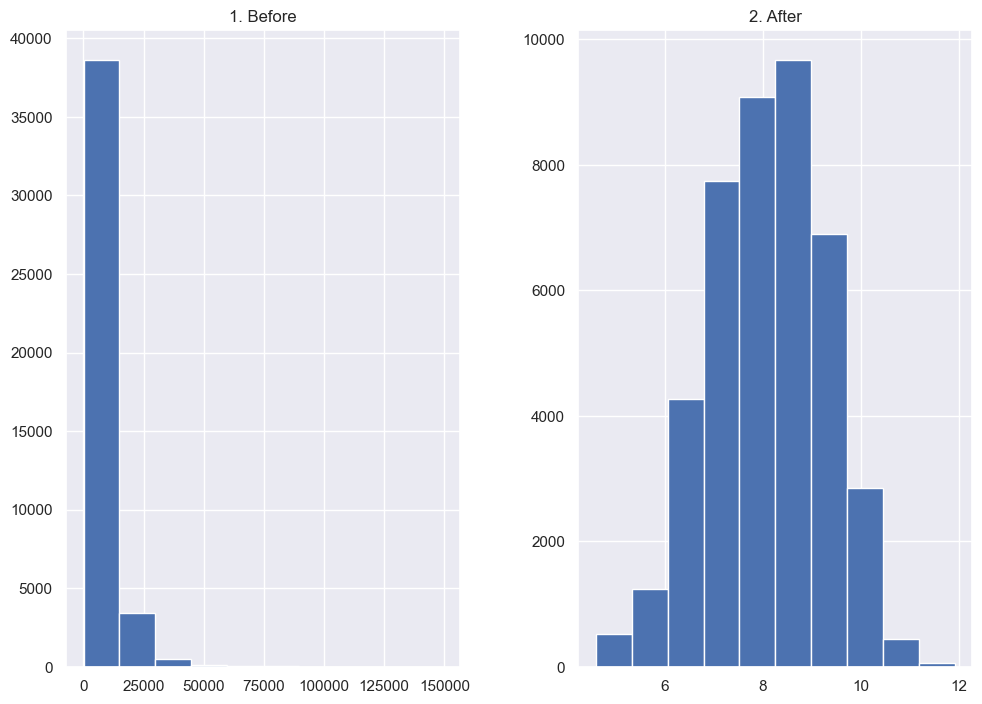

In [649]:
prices = pd.DataFrame({'1. Before':y2, '2. After':np.log(y2)})
prices.hist()

In [670]:
# Transforming price as a logarithmic values
y2 = np.log(y2)

In [672]:
# Splitting data into test and train
x_train,x_test , Y_train,Y_test = train_test_split(x2,y2, random_state = 3, test_size = 0.3)
x_train.shape, x_test.shape, Y_train.shape, Y_test.shape

((29940, 303), (12832, 303), (29940,), (12832,))

####  *Baseline Model for imputed data*
We are making a base model by using test data mean value.
This is to set a benchmark and to compare with our regression model

In [673]:
# Finding the mean for test data value
base_pred = np.mean(Y_test)
base_pred

8.068391740519065

In [674]:
#repeating same value till length of test data
base_pred = np.repeat(base_pred, len(Y_test))
base_pred

array([8.06839174, 8.06839174, 8.06839174, ..., 8.06839174, 8.06839174,
       8.06839174])

In [675]:
# finding the RMSE
base_rmse_imp = np.sqrt(mean_squared_error(Y_test, base_pred))
base_rmse_imp

1.1884349112889792

## Linear Regression with Imputed Data

In [676]:
# Setting intercept as True
lgr2 = LinearRegression(fit_intercept = True)

In [680]:
# Model
model_lin2 = lgr2.fit(x_train,Y_train)

In [682]:
# Predicting model on test set
cars_predictions_lin2 = lgr2.predict(x_test)

In [683]:
# Computing MSE and RMSE
lin_mse2 = mean_squared_error(Y_test, cars_predictions_lin2)
lin_rmse2 = np.sqrt(lin_mse2)
lin_rmse2

0.6661303703114501

In [686]:
# R squared value
r2_lin_train2 = model_lin2.score(x_test, Y_test)
r2_lin_test2 = model_lin2.score(x_train, Y_train)
r2_lin_test2 , r2_lin_train2

(0.693660925451381, 0.6858278624543754)

## Random Forest Model for Imputed Data

In [690]:
# Model parameters
rf2 = RandomForestRegressor(n_estimators= 100,
                            max_depth = 100, min_samples_split = 10,
                            min_samples_leaf = 4, random_state = 1)

In [691]:
# Model
model_rf2 = rf2.fit(x_train, Y_train)

In [692]:
# Predicing model on test set
cars_predictions_rf2 = rf2.predict(x_test)

In [693]:
# Computing MSE and RMSE
rf_mse2 = mean_squared_error(Y_test, cars_predictions_rf2)
rf_rmse2 = np.sqrt(rf_mse2)
rf_rmse2

0.5876424863809075

In [695]:
# R squared value
r2_rf_test2 = model_rf2.score(x_test, Y_test)
r2_rf_train2 = model_rf2.score(x_train, Y_train)
r2_rf_test2, r2_rf_train2

(0.7555018524307894, 0.854919780121372)